<a href="https://colab.research.google.com/github/emiliomercuri/EnvHidrology2024/blob/main/aulas/2024_03_04-Aula_03/2024_03_04_Atividade_em_sala_Leitura_dos_dados_da_base_CABra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Leitura dos dados da Base CABra

1. Acessar o site da plataforma Catchments Attributes for Brazil (CABra) https://thecabradataset.shinyapps.io/CABra/

2. Baixar os dados **Climate** e **Streamflow**

3. Colocar os arquivos no Google Drive

4. Compartilhar os arquivos (opção "qualquer pessoa com o link") e copiar o link

In [2]:
import pandas as pd
import numpy
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

## Download dos dados na máquina virtual Google

Copiar o código que está no link:
https://drive.google.com/file/d/1TaMLC6-FbfXKltZRvCmGPEGUFwm6NVG8/view?usp=sharing

In [3]:
# Baixa dados da base CABra
!gdown 1TaMLC6-FbfXKltZRvCmGPEGUFwm6NVG8
!gdown 10Q5W4Lj5Mi3RbEzEBf4vd3CRz5iZiFld

Downloading...
From: https://drive.google.com/uc?id=1TaMLC6-FbfXKltZRvCmGPEGUFwm6NVG8
To: /content/CABra_1_climate_ENS.txt
100% 1.47M/1.47M [00:00<00:00, 99.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=10Q5W4Lj5Mi3RbEzEBf4vd3CRz5iZiFld
To: /content/CABra_1_streamflow.txt
100% 482k/482k [00:00<00:00, 114MB/s]


## Leitura dos dados climáticos

In [4]:
# leitura dos dados com pandas
df_climate = pd.read_csv('CABra_1_climate_ENS.txt',sep='\s+',skiprows=13)
df_climate

,Year,Month,Day,p_ens,tmin_ens,tmax_ens,rh_ens,wnd_ens,srad_ens,et_ens,pet_pm,pet_pt,pet_hg
0,mm,°C,°C,%,m,s¯¹,MJ,m¯²,mm,mm,mm,mm,NaN
1,1980,1,1,17.744,20.745,27.849,89.784,1.068,11.593,3.928,3.139,3.652,2.700
2,1980,1,2,6.515,20.510,29.676,84.342,0.522,16.139,4.038,4.082,4.934,3.825
3,1980,1,3,4.314,21.578,30.517,84.951,0.820,17.680,4.202,4.523,5.406,4.262
4,1980,1,4,3.955,22.022,31.363,82.714,1.012,16.178,4.729,4.318,5.017,3.963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319,2010,12,27,9.375,22.935,29.573,85.749,1.214,15.057,4.146,3.930,4.688,3.658
11320,2010,12,28,6.888,22.896,31.206,82.553,1.165,19.261,3.709,4.957,5.922,4.759
11321,2010,12,29,4.397,23.094,31.305,82.595,1.446,19.609,4.544,5.090,6.033,4.866
11322,2010,12,30,6.692,22.873,30.114,84.971,1.329,15.503,4.686,4.080,4.818,3.779


In [5]:
# Remove a primeira linha do dataframe
df_climate = df_climate.drop([0])
df_climate

,Year,Month,Day,p_ens,tmin_ens,tmax_ens,rh_ens,wnd_ens,srad_ens,et_ens,pet_pm,pet_pt,pet_hg
1,1980,1,1,17.744,20.745,27.849,89.784,1.068,11.593,3.928,3.139,3.652,2.700
2,1980,1,2,6.515,20.510,29.676,84.342,0.522,16.139,4.038,4.082,4.934,3.825
3,1980,1,3,4.314,21.578,30.517,84.951,0.820,17.680,4.202,4.523,5.406,4.262
4,1980,1,4,3.955,22.022,31.363,82.714,1.012,16.178,4.729,4.318,5.017,3.963
5,1980,1,5,4.798,21.741,30.880,82.440,1.134,17.508,3.945,4.597,5.379,4.256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319,2010,12,27,9.375,22.935,29.573,85.749,1.214,15.057,4.146,3.930,4.688,3.658
11320,2010,12,28,6.888,22.896,31.206,82.553,1.165,19.261,3.709,4.957,5.922,4.759
11321,2010,12,29,4.397,23.094,31.305,82.595,1.446,19.609,4.544,5.090,6.033,4.866
11322,2010,12,30,6.692,22.873,30.114,84.971,1.329,15.503,4.686,4.080,4.818,3.779


In [6]:
df_climate.columns

Index(['Year', 'Month', 'Day', 'p_ens', 'tmin_ens', 'tmax_ens', 'rh_ens',
       'wnd_ens', 'srad_ens', 'et_ens', 'pet_pm', 'pet_pt', 'pet_hg'],
      dtype='object')

In [7]:
ano = df_climate['Year'].values
mes = df_climate['Month'].values
dia = df_climate['Day'].values

In [8]:
data = []
for i in range(len(df_climate)):
    data.append(ano[i] + '-' + mes[i] + '-' + dia[i])
#data

In [9]:
lista = []
for i in range(len(df_climate)):
    lista.append(datetime.strptime(data[i], '%Y-%m-%d'))

In [10]:
df_climate['data'] = lista

In [11]:
df_climate

,Year,Month,Day,p_ens,tmin_ens,tmax_ens,rh_ens,wnd_ens,srad_ens,et_ens,pet_pm,pet_pt,pet_hg,data
1,1980,1,1,17.744,20.745,27.849,89.784,1.068,11.593,3.928,3.139,3.652,2.700,1980-01-01
2,1980,1,2,6.515,20.510,29.676,84.342,0.522,16.139,4.038,4.082,4.934,3.825,1980-01-02
3,1980,1,3,4.314,21.578,30.517,84.951,0.820,17.680,4.202,4.523,5.406,4.262,1980-01-03
4,1980,1,4,3.955,22.022,31.363,82.714,1.012,16.178,4.729,4.318,5.017,3.963,1980-01-04
5,1980,1,5,4.798,21.741,30.880,82.440,1.134,17.508,3.945,4.597,5.379,4.256,1980-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319,2010,12,27,9.375,22.935,29.573,85.749,1.214,15.057,4.146,3.930,4.688,3.658,2010-12-27
11320,2010,12,28,6.888,22.896,31.206,82.553,1.165,19.261,3.709,4.957,5.922,4.759,2010-12-28
11321,2010,12,29,4.397,23.094,31.305,82.595,1.446,19.609,4.544,5.090,6.033,4.866,2010-12-29
11322,2010,12,30,6.692,22.873,30.114,84.971,1.329,15.503,4.686,4.080,4.818,3.779,2010-12-30


In [12]:
df_climate = df_climate.set_index('data')
df_climate

,Year,Month,Day,p_ens,tmin_ens,tmax_ens,rh_ens,wnd_ens,srad_ens,et_ens,pet_pm,pet_pt,pet_hg
data,,,,,,,,,,,,,
1980-01-01,1980,1,1,17.744,20.745,27.849,89.784,1.068,11.593,3.928,3.139,3.652,2.700
1980-01-02,1980,1,2,6.515,20.510,29.676,84.342,0.522,16.139,4.038,4.082,4.934,3.825
1980-01-03,1980,1,3,4.314,21.578,30.517,84.951,0.820,17.680,4.202,4.523,5.406,4.262
1980-01-04,1980,1,4,3.955,22.022,31.363,82.714,1.012,16.178,4.729,4.318,5.017,3.963
1980-01-05,1980,1,5,4.798,21.741,30.880,82.440,1.134,17.508,3.945,4.597,5.379,4.256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-27,2010,12,27,9.375,22.935,29.573,85.749,1.214,15.057,4.146,3.930,4.688,3.658
2010-12-28,2010,12,28,6.888,22.896,31.206,82.553,1.165,19.261,3.709,4.957,5.922,4.759
2010-12-29,2010,12,29,4.397,23.094,31.305,82.595,1.446,19.609,4.544,5.090,6.033,4.866


In [13]:
df_climate = df_climate.drop(['Year','Month','Day'], axis=1)
df_climate

,p_ens,tmin_ens,tmax_ens,rh_ens,wnd_ens,srad_ens,et_ens,pet_pm,pet_pt,pet_hg
data,,,,,,,,,,
1980-01-01,17.744,20.745,27.849,89.784,1.068,11.593,3.928,3.139,3.652,2.700
1980-01-02,6.515,20.510,29.676,84.342,0.522,16.139,4.038,4.082,4.934,3.825
1980-01-03,4.314,21.578,30.517,84.951,0.820,17.680,4.202,4.523,5.406,4.262
1980-01-04,3.955,22.022,31.363,82.714,1.012,16.178,4.729,4.318,5.017,3.963
1980-01-05,4.798,21.741,30.880,82.440,1.134,17.508,3.945,4.597,5.379,4.256
...,...,...,...,...,...,...,...,...,...,...
2010-12-27,9.375,22.935,29.573,85.749,1.214,15.057,4.146,3.930,4.688,3.658
2010-12-28,6.888,22.896,31.206,82.553,1.165,19.261,3.709,4.957,5.922,4.759
2010-12-29,4.397,23.094,31.305,82.595,1.446,19.609,4.544,5.090,6.033,4.866


In [14]:
df_climate['p_ens(mm)'] = df_climate['p_ens']
df_climate['tmin_ens(oC)'] = df_climate['tmin_ens']
df_climate['tmax_ens(oC)'] = df_climate['tmax_ens']
df_climate

,p_ens,tmin_ens,tmax_ens,rh_ens,wnd_ens,srad_ens,et_ens,pet_pm,pet_pt,pet_hg,p_ens(mm),tmin_ens(oC),tmax_ens(oC)
data,,,,,,,,,,,,,
1980-01-01,17.744,20.745,27.849,89.784,1.068,11.593,3.928,3.139,3.652,2.700,17.744,20.745,27.849
1980-01-02,6.515,20.510,29.676,84.342,0.522,16.139,4.038,4.082,4.934,3.825,6.515,20.510,29.676
1980-01-03,4.314,21.578,30.517,84.951,0.820,17.680,4.202,4.523,5.406,4.262,4.314,21.578,30.517
1980-01-04,3.955,22.022,31.363,82.714,1.012,16.178,4.729,4.318,5.017,3.963,3.955,22.022,31.363
1980-01-05,4.798,21.741,30.880,82.440,1.134,17.508,3.945,4.597,5.379,4.256,4.798,21.741,30.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-27,9.375,22.935,29.573,85.749,1.214,15.057,4.146,3.930,4.688,3.658,9.375,22.935,29.573
2010-12-28,6.888,22.896,31.206,82.553,1.165,19.261,3.709,4.957,5.922,4.759,6.888,22.896,31.206
2010-12-29,4.397,23.094,31.305,82.595,1.446,19.609,4.544,5.090,6.033,4.866,4.397,23.094,31.305


In [15]:
df_climate_novo = df_climate[['p_ens(mm)','tmin_ens(oC)','tmax_ens(oC)']]
df_climate_novo

,p_ens(mm),tmin_ens(oC),tmax_ens(oC)
data,,,
1980-01-01,17.744,20.745,27.849
1980-01-02,6.515,20.510,29.676
1980-01-03,4.314,21.578,30.517
1980-01-04,3.955,22.022,31.363
1980-01-05,4.798,21.741,30.880
...,...,...,...
2010-12-27,9.375,22.935,29.573
2010-12-28,6.888,22.896,31.206
2010-12-29,4.397,23.094,31.305


In [16]:
print(df_climate_novo.dtypes)

p_ens(mm)       object
tmin_ens(oC)    object
tmax_ens(oC)    object
dtype: object


In [17]:
# Change multiple columns type
df_climate_novo = df_climate_novo.astype({'p_ens(mm)': float,'tmin_ens(oC)': float, 'tmax_ens(oC)': float})

In [18]:
print(df_climate_novo.dtypes)

p_ens(mm)       float64
tmin_ens(oC)    float64
tmax_ens(oC)    float64
dtype: object


## Leitura dos dados de vazão

In [19]:
# leitura dos dados com pandas
df_streamflow = pd.read_csv('CABra_1_streamflow.txt',sep='\s+',skiprows=8)
df_streamflow

,Year,Month,Day,Streamflow,Quality
0,(m³s¯¹),NaN,NaN,NaN,NaN
1,1980,10.0,1.0,1165.800,2.0
2,1980,10.0,2.0,1181.200,2.0
3,1980,10.0,3.0,1194.400,2.0
4,1980,10.0,4.0,1201.000,2.0
...,...,...,...,...,...
10953,2010,9.0,26.0,938.606,1.0
10954,2010,9.0,27.0,933.871,1.0
10955,2010,9.0,28.0,931.509,1.0
10956,2010,9.0,29.0,933.871,1.0


In [20]:
# Remove a primeira linha do dataframe
df_streamflow = df_streamflow.drop([0])
df_streamflow

,Year,Month,Day,Streamflow,Quality
1,1980,10.0,1.0,1165.800,2.0
2,1980,10.0,2.0,1181.200,2.0
3,1980,10.0,3.0,1194.400,2.0
4,1980,10.0,4.0,1201.000,2.0
5,1980,10.0,5.0,1203.200,2.0
...,...,...,...,...,...
10953,2010,9.0,26.0,938.606,1.0
10954,2010,9.0,27.0,933.871,1.0
10955,2010,9.0,28.0,931.509,1.0
10956,2010,9.0,29.0,933.871,1.0


In [21]:
ano = df_streamflow['Year'].values
mes = df_streamflow['Month'].values
dia = df_streamflow['Day'].values

In [22]:
data = []
for i in range(len(df_streamflow)):
    data.append(ano[i] + '-' + str(int(mes[i])) + '-' + str(int(dia[i])))
#data

In [23]:
lista = []
for i in range(len(df_streamflow)):
    lista.append(datetime.strptime(data[i], '%Y-%m-%d'))

In [24]:
df_streamflow['data'] = lista

In [25]:
df_streamflow = df_streamflow.set_index('data')
df_streamflow

,Year,Month,Day,Streamflow,Quality
data,,,,,
1980-10-01,1980,10.0,1.0,1165.800,2.0
1980-10-02,1980,10.0,2.0,1181.200,2.0
1980-10-03,1980,10.0,3.0,1194.400,2.0
1980-10-04,1980,10.0,4.0,1201.000,2.0
1980-10-05,1980,10.0,5.0,1203.200,2.0
...,...,...,...,...,...
2010-09-26,2010,9.0,26.0,938.606,1.0
2010-09-27,2010,9.0,27.0,933.871,1.0
2010-09-28,2010,9.0,28.0,931.509,1.0


In [26]:
print(df_streamflow.dtypes)

Year           object
Month         float64
Day           float64
Streamflow    float64
Quality       float64
dtype: object


In [27]:
df_streamflow['Streamflow(m3/s)'] = df_streamflow['Streamflow']

In [28]:
df_streamflow_novo = df_streamflow[['Streamflow(m3/s)']]
df_streamflow_novo

,Streamflow(m3/s)
data,
1980-10-01,1165.800
1980-10-02,1181.200
1980-10-03,1194.400
1980-10-04,1201.000
1980-10-05,1203.200
...,...
2010-09-26,938.606
2010-09-27,933.871
2010-09-28,931.509


# Gráfico chuva $\times$ vazão

<Axes: xlabel='data'>

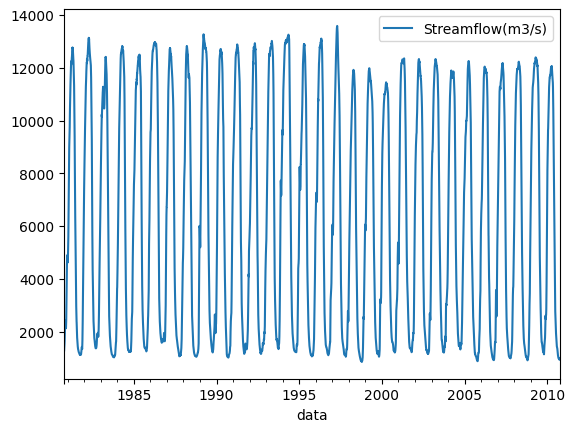

In [29]:
df_streamflow_novo.plot()

<Axes: xlabel='data'>

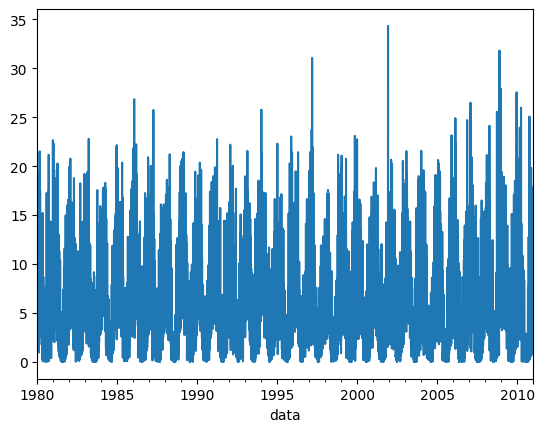

In [30]:
df_climate_novo['p_ens(mm)'].plot()

<Axes: xlabel='data'>

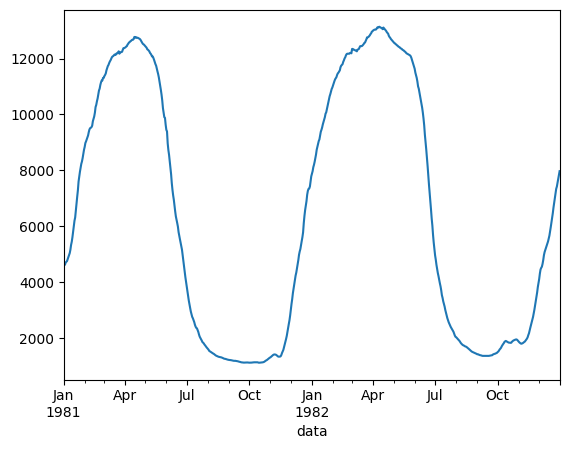

In [31]:
df_streamflow_novo['Streamflow(m3/s)']['1981':'1982'].plot()

<Axes: xlabel='data'>

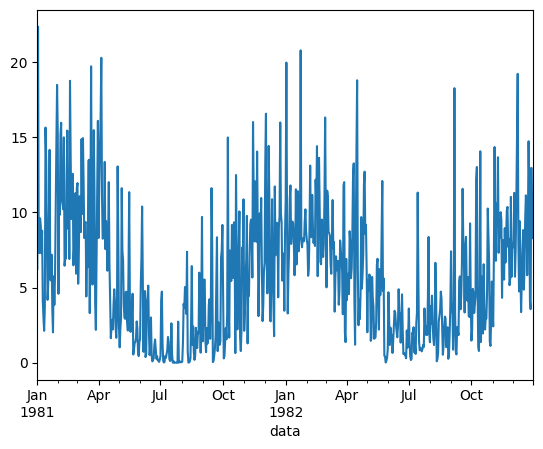

In [32]:
df_climate_novo['p_ens(mm)']['1981':'1982'].plot()

In [33]:
Q = df_streamflow_novo['Streamflow(m3/s)']['1981-1-1':'1981-12-31']
P = df_climate_novo['p_ens(mm)']['1981-1-1':'1981-12-31']
index_prec = df_climate_novo['1981-1-1':'1981-12-31'].index

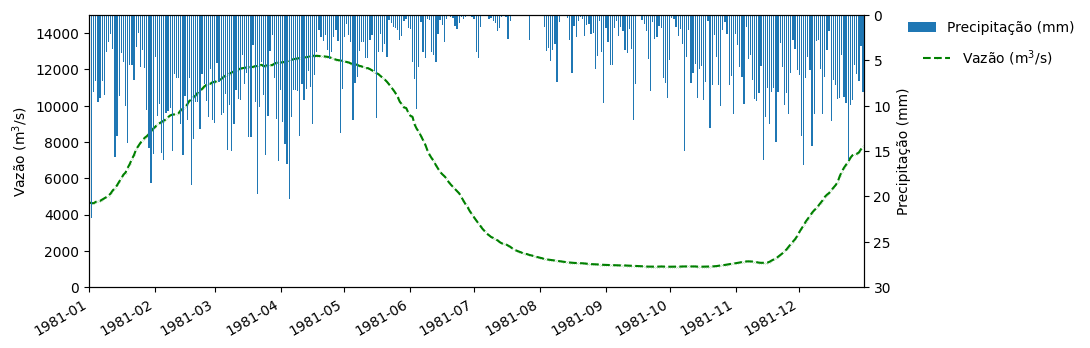

In [34]:
fig, ax1 = plt.subplots(figsize=(10,4))

ax1.plot(Q,color='green', marker='o', linestyle='dashed',linewidth=1.5, markersize=0.1, label = r'Vazão (m$^3$/s)')
ax1.set_ylim(0,15000)
ax1.margins(0.0)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
ax1.set_ylabel(r'Vazão (m$^3$/s)', fontsize=10) #y label

ax1.legend(bbox_to_anchor=(1.25, 0.9), borderaxespad=0.,frameon=False)

ax2 = ax1.twinx()
ax2.margins(0.0)
ax2.bar(index_prec,P, width=0.6, label = 'Precipitação (mm)')

ax2.set_ylabel('Precipitação (mm)', fontsize=10) #y label
ax2.set_ylim(30,0)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,frameon=False)
plt.savefig('vazao_versus_prec_selecao.png', dpi = 300, bbox_inches='tight')
plt.show()

## Mudanças Climáticas?

In [35]:
df_climate_novo['t_med(oC)'] = (df_climate_novo['tmin_ens(oC)']+
                                df_climate_novo['tmax_ens(oC)'])/2

<Axes: xlabel='data'>

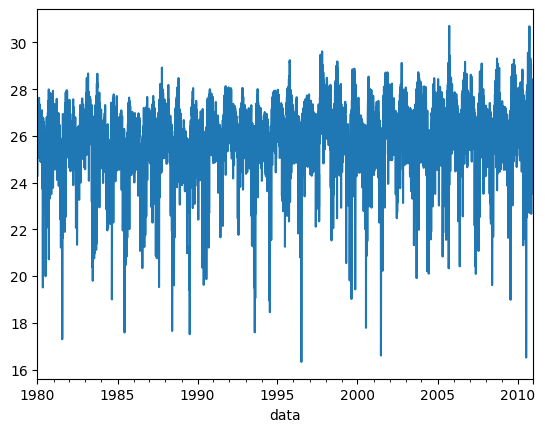

In [36]:
df_climate_novo['t_med(oC)'].plot()

In [37]:
df_climate_novo

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),t_med(oC)
data,,,,
1980-01-01,17.744,20.745,27.849,24.2970
1980-01-02,6.515,20.510,29.676,25.0930
1980-01-03,4.314,21.578,30.517,26.0475
1980-01-04,3.955,22.022,31.363,26.6925
1980-01-05,4.798,21.741,30.880,26.3105
...,...,...,...,...
2010-12-27,9.375,22.935,29.573,26.2540
2010-12-28,6.888,22.896,31.206,27.0510
2010-12-29,4.397,23.094,31.305,27.1995


In [38]:
df_climate_novo['data'] = pd.to_datetime(df_climate_novo.index)
df_climate_novo

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),t_med(oC),data
data,,,,,
1980-01-01,17.744,20.745,27.849,24.2970,1980-01-01
1980-01-02,6.515,20.510,29.676,25.0930,1980-01-02
1980-01-03,4.314,21.578,30.517,26.0475,1980-01-03
1980-01-04,3.955,22.022,31.363,26.6925,1980-01-04
1980-01-05,4.798,21.741,30.880,26.3105,1980-01-05
...,...,...,...,...,...
2010-12-27,9.375,22.935,29.573,26.2540,2010-12-27
2010-12-28,6.888,22.896,31.206,27.0510,2010-12-28
2010-12-29,4.397,23.094,31.305,27.1995,2010-12-29


In [39]:
df_climate_selecao_anual = df_climate_novo.resample('Y', on='data').mean()

In [40]:
df_climate_selecao_anual

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),t_med(oC)
data,,,,
1980-12-31,5.391336,21.382951,30.370508,25.876730
1981-12-31,5.778463,21.313334,30.139058,25.726196
1982-12-31,5.864907,21.597745,30.134781,25.866263
1983-12-31,5.057241,21.612200,30.689425,26.150812
1984-12-31,6.080784,21.159022,30.015686,25.587354
1985-12-31,6.417627,21.029751,29.733340,25.381545
1986-12-31,6.125422,21.126836,29.846597,25.486716
1987-12-31,5.548186,21.459770,30.527929,25.993849
1988-12-31,5.464046,20.913921,30.426653,25.670287


In [41]:
df_climate_selecao_anual['ano'] = df_climate_selecao_anual.index.year
df_climate_selecao_anual

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),t_med(oC),ano
data,,,,,
1980-12-31,5.391336,21.382951,30.370508,25.876730,1980
1981-12-31,5.778463,21.313334,30.139058,25.726196,1981
1982-12-31,5.864907,21.597745,30.134781,25.866263,1982
1983-12-31,5.057241,21.612200,30.689425,26.150812,1983
1984-12-31,6.080784,21.159022,30.015686,25.587354,1984
1985-12-31,6.417627,21.029751,29.733340,25.381545,1985
1986-12-31,6.125422,21.126836,29.846597,25.486716,1986
1987-12-31,5.548186,21.459770,30.527929,25.993849,1987
1988-12-31,5.464046,20.913921,30.426653,25.670287,1988


In [42]:
year = df_climate_selecao_anual['ano'].values
temp = df_climate_selecao_anual['t_med(oC)'].values

In [43]:
a1, a0 = numpy.polyfit(year, temp,1)
f_linear = numpy.poly1d((a1, a0))

In [44]:
a1, a0

(0.029154240559705957, -32.120196495916005)

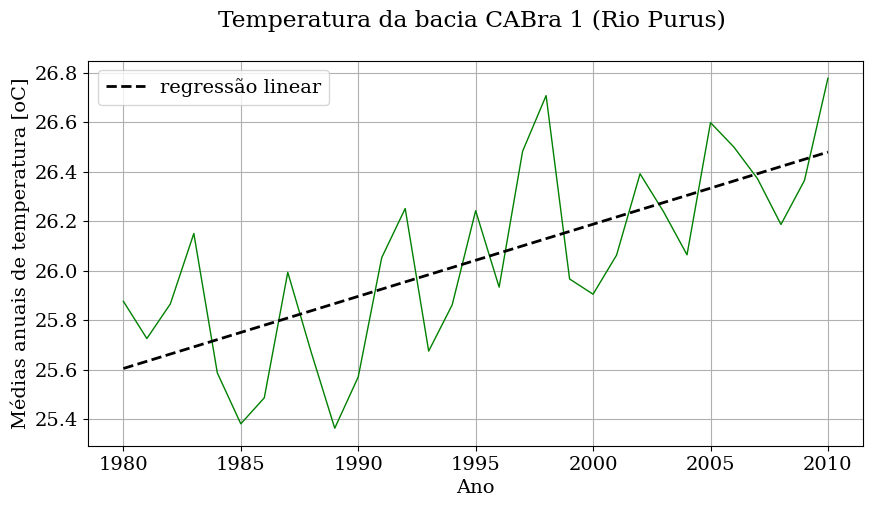

In [45]:
plt.rc('font',family='serif',size='14')
plt.figure(figsize=(10,5))
plt.plot(year,temp,color='green',linestyle='-', linewidth=1)
plt.plot(year,f_linear(year),color='black',linestyle='--', linewidth=2,label='regressão linear')
plt.title('Temperatura da bacia CABra 1 (Rio Purus) \n')
plt.xlabel('Ano')
plt.ylabel('Médias anuais de temperatura [oC]')
plt.legend(loc='best',fontsize=14)
plt.grid();

In [46]:
delta = f_linear(2010)-f_linear(1980)
delta

0.8746272167911755